In [45]:
import numpy as np
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Utkarsh Sharma\Desktop\Apple stock price time series Part 1\AAPL.csv')
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600

In [48]:
df.shape

(10468, 7)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [50]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [51]:
df['Date']=pd.to_datetime(df['Date'])

In [52]:
df['Date'].max()

Timestamp('2022-06-17 00:00:00')

In [53]:
type(df['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [54]:
df.describe()

Open          High           Low         Close     Adj Close  \
count  10468.000000  10468.000000  10468.000000  10468.000000  10468.000000   
mean      14.757987     14.921491     14.594484     14.763533     14.130431   
std       31.914174     32.289158     31.543959     31.929489     31.637275   
min        0.049665      0.049665      0.049107      0.049107      0.038329   
25%        0.283482      0.289286      0.276786      0.283482      0.235462   
50%        0.474107      0.482768      0.465960      0.475446      0.392373   
75%       14.953303     15.057143     14.692589     14.901964     12.835269   
max      182.630005    182.940002    179.119995    182.009995    181.511703   

             Volume  
count  1.046800e+04  
mean   3.308489e+08  
std    3.388418e+08  
min    0.000000e+00  
25%    1.237768e+08  
50%    2.181592e+08  
75%    4.105794e+08  
max    7.421641e+09

# Time Series Analysis

In [55]:
df=df.set_index('Date')
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...                ...         ...         ...         ...         ...   
2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

               Volume  
Date                   
1980-12-12  469033600  
1980-12-15  175884800  
1980-12-16  105728000  
1980-12-17   86441600  
1980-12-18   73449600  
...               ...  
2022-06-13  122207100  
2022-06-14   84784300  
2022-06-15   91533000  
2022-06-16  108123900  
2022-06-17  134118500  

[10468 rows x 6 columns]

In [56]:
fig=make_subplots(rows=6,cols=1,
                  subplot_titles=('opening price','closing price','highest price','lowest price','adjusted price','volume'))
fig.add_trace(go.Scatter(x=df.index,y=df['Open']),row=1,col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['Close']),row=2,col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['High']),row=3,col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['Low']),row=4,col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['Adj Close']),row=5,col=1)
fig.add_trace(go.Scatter(x=df.index,y=df['Volume']),row=6,col=1)
fig.update_layout(showlegend=False, height=1200, width=800)
fig.show()

In [57]:
fig = go.Figure(data=go.Ohlc(x=df.index, open=df["Open"], high=df["High"], low=df["Low"], close=df["Close"]))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(title_text="OHLC Chart", title_x=0.5)
fig.show()


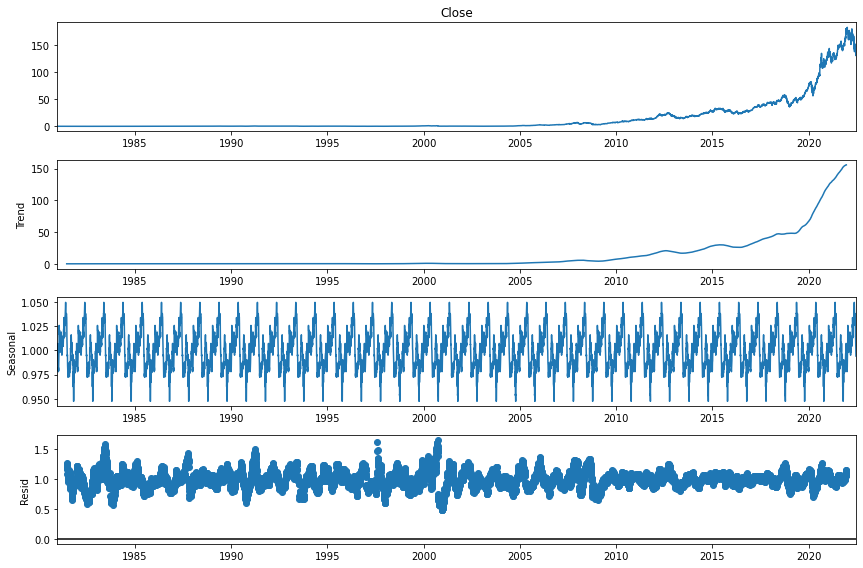

In [58]:
results = seasonal_decompose(df["Close"], model="multiplicative", period=252)
fig = results.plot()
fig.set_size_inches(12, 8)
fig.tight_layout()
plt.show()

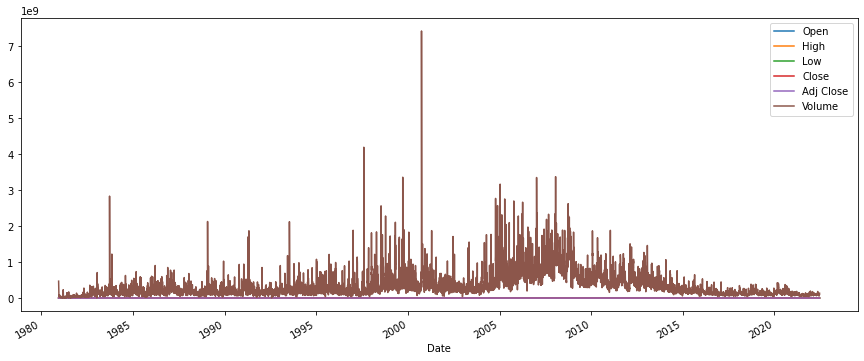

In [59]:
df.plot(figsize=(15,6))
plt.show()


# Resample

In [60]:
df1=df['Close'].resample('MS').mean()
df1.shape

(499,)

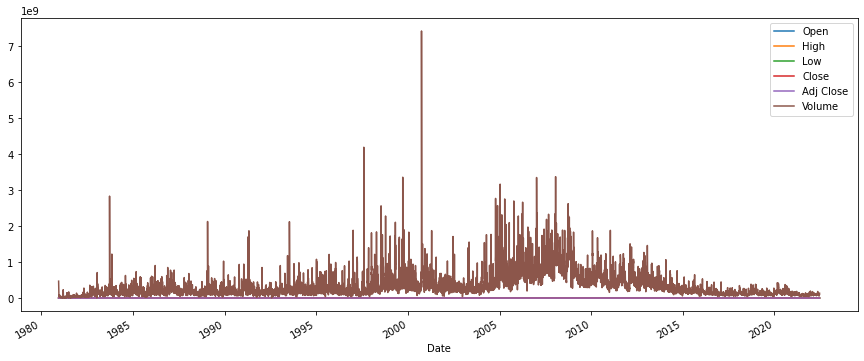

In [61]:
df.plot(figsize=(15,6))
plt.show()

# Check Stationarity

In [62]:
from pandas import Series
result=adfuller(df1)
print('ADF statistic: %f' %result[0])
print('p value: %f' % result[1])
print('critical value')
for key , value in result[4].items():
    print('\t%s: %.3f' %(key,value))

ADF statistic: -0.847917
p value: 0.804640
critical value
	1%: -3.444
	5%: -2.868
	10%: -2.570


# Removing the Stationarity

In [63]:
differenced_df =df1-df1.shift()

In [64]:
result=adfuller(differenced_df.dropna())
print('ADF statistic: %f' %result[0])
print('p value: %f' % result[1])
print('critical value')
for key , value in result[4].items():
    print('\t%s: %.3f' %(key,value))

ADF statistic: -3.632591
p value: 0.005168
critical value
	1%: -3.444
	5%: -2.868
	10%: -2.570


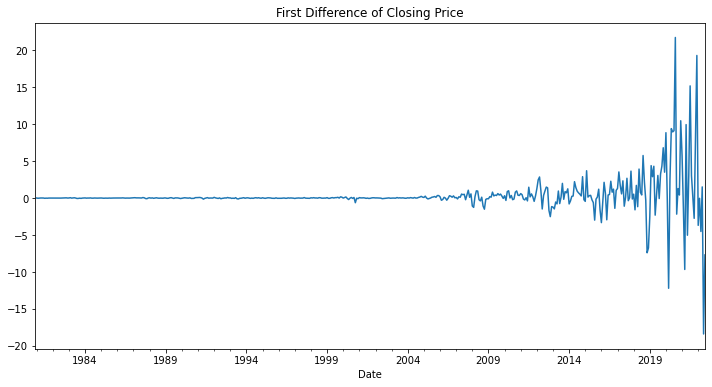

In [65]:
plt.figure(figsize=(12, 6))
differenced_df.plot()
plt.title("First Difference of Closing Price")
plt.show()

# Determining the p and q Values
SARIMA model is comprised of 4 parts; S (Seasonal), p (Autoregressive), d (Integrated) and q (Moving Average). As I already know d value and what kind of seasonality is present in the data, there are one thing left to do: determining p and q values (p for AR part and q for MA). I simply plot the Autocorrelation and Partial Autocorrelation graphs for determining q and p values respectively. Looking at the ACF and PACF plot, it can be observed that first lags of each plot are outside the blue area meaning that those values are statistically significant. So I determine the p and q values as 1.

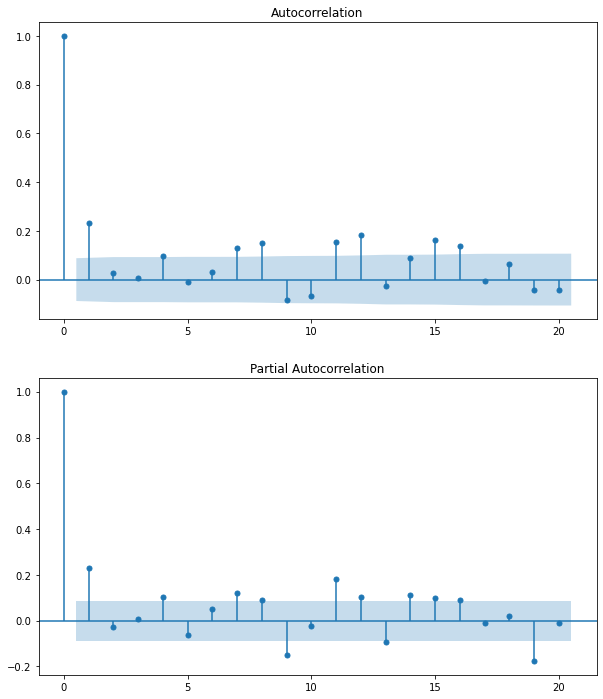

In [66]:

fig, ax = plt.subplots(2 ,1, figsize=(10, 12))
plot_acf(differenced_df.iloc[1:], lags=20, ax=ax[0])
plot_pacf(differenced_df.iloc[1:], lags=20, ax=ax[1])
plt.show()

# Model Building



# 1. Parameter Selection

In [67]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [68]:
seasonal_pdq=[(x[0],x[1],x[2],12)for x in pdq]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [69]:
import statsmodels.api as sm
for i in pdq:
    for j in seasonal_pdq:
        mod=sm.tsa.statespace.SARIMAX(df1,order=i,seasonal_order=j)
        result=mod.fit()
        print('ARIMA{}x{}12- AIC:{}'.format(i,j,result.aic))

        


ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:4977.272428062648
ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:4469.263066332017
ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:3771.5647022956905
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:3582.479679470512
ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:3917.754094965538
ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:3726.8797215684904
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:3543.7461169337125
ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:3515.5323804884138
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:4339.745060137549
ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:3850.889512565398
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:3201.5399555953
ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:3105.6349543512542
ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:3330.550956070818
ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:3232.6318098469565
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:3068.3626810518076
ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:3028.973044357438
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:2305.919129372089
ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:2281.552450070703
ARIMA(0, 1, 0)x(0, 1, 0

In [70]:
mod=sm.tsa.statespace.SARIMAX(df1,order=(0,1,1),
                              seasonal_order=(1,1,1,12),
                             # enforce_stationarity=False,
                              enforce_inveribility=False)
results=mod.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  499
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1112.349
Date:                            Tue, 04 Oct 2022   AIC                           2232.699
Time:                                    17:13:45   BIC                           2249.443
Sample:                                12-01-1980   HQIC                          2239.277
                                     - 06-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2227      0.018     12.091      0.000       0.187       0.259
ar.S.L12       0.1502      0.034   

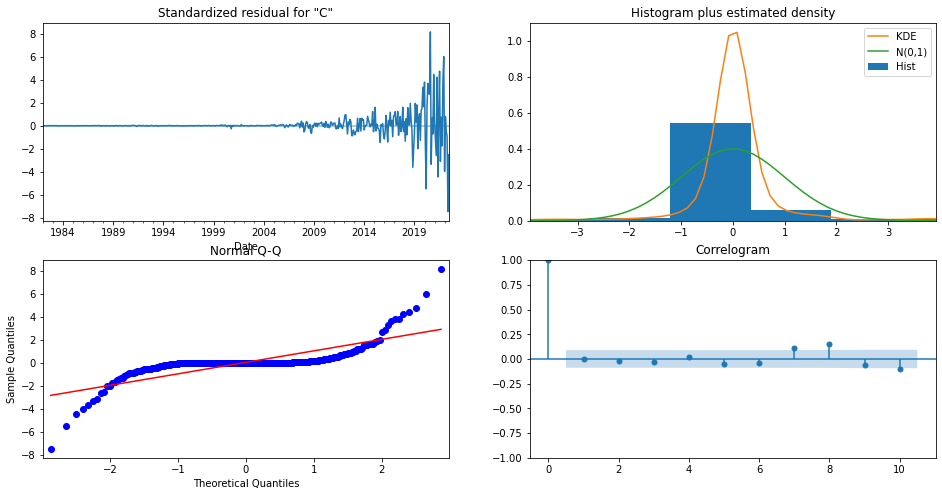

In [71]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

Validating Forecasting

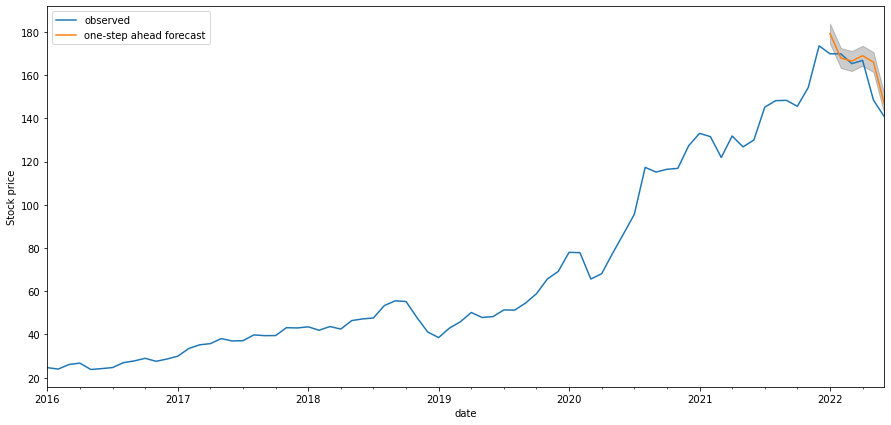

In [74]:
pred=results.get_prediction(start=pd.to_datetime('2022-01-01'),dynamic=False)
pred_ci=pred.conf_int()
#conf_int returns the confidence interval of the fitted parameters
ax=df1['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='one-step ahead forecast',alpha=1,figsize=(15,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color='k',alpha=.2)
ax.set_xlabel('date')
ax.set_ylabel('Stock price')
plt.legend()
plt.show()


In [75]:
df1_forecasted=pred.predicted_mean
df1_truth=df1['2022-01-01']
mse=((df1_forecasted-df1_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 109.55
The Root Mean Squared Error of our forecasts is 10.47


# Forecasting Closing Price From August 2022 to 2023¶


5.5 Visualizing the forecasts¶

            lower Close  upper Close
2022-07-01   141.133300   150.381581
2022-08-01   142.690403   157.298505
2022-09-01   141.126992   159.600286
2022-10-01   139.288452   160.947827
2022-11-01   141.084574   165.518044
2022-12-01   147.013125   173.936357
2023-01-01   145.918458   175.119937
2023-02-01   145.204776   176.519186
2023-03-01   141.097279   174.390795
2023-04-01   142.409947   177.571349
2023-05-01   136.127232   173.062176
2023-06-01   134.114337   172.741478
2023-07-01   137.427285   178.604386


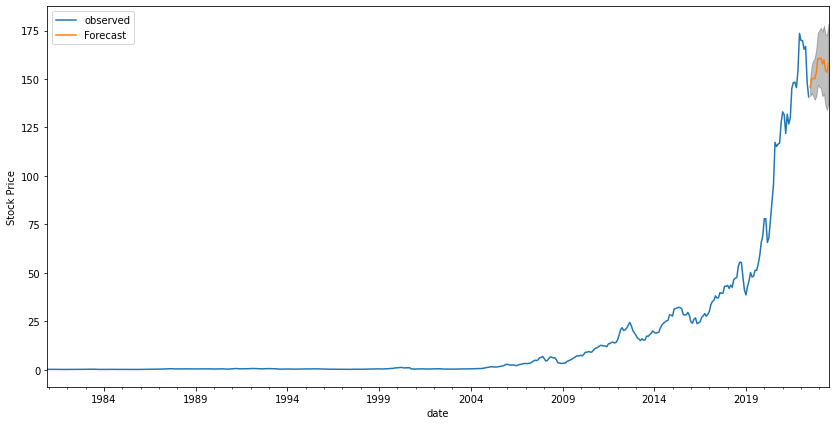

In [76]:
pred_uc=results.get_forecast(steps=13)
pred_ci=pred_uc.conf_int()
ax=df1.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('date')
ax.set_ylabel('Stock Price')
print(pred_ci)
plt.legend()
plt.show()